In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [13]:
# Load the dataset
data = pd.read_csv("./Dataset/Real estate.csv")
print(data.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

In [4]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 n

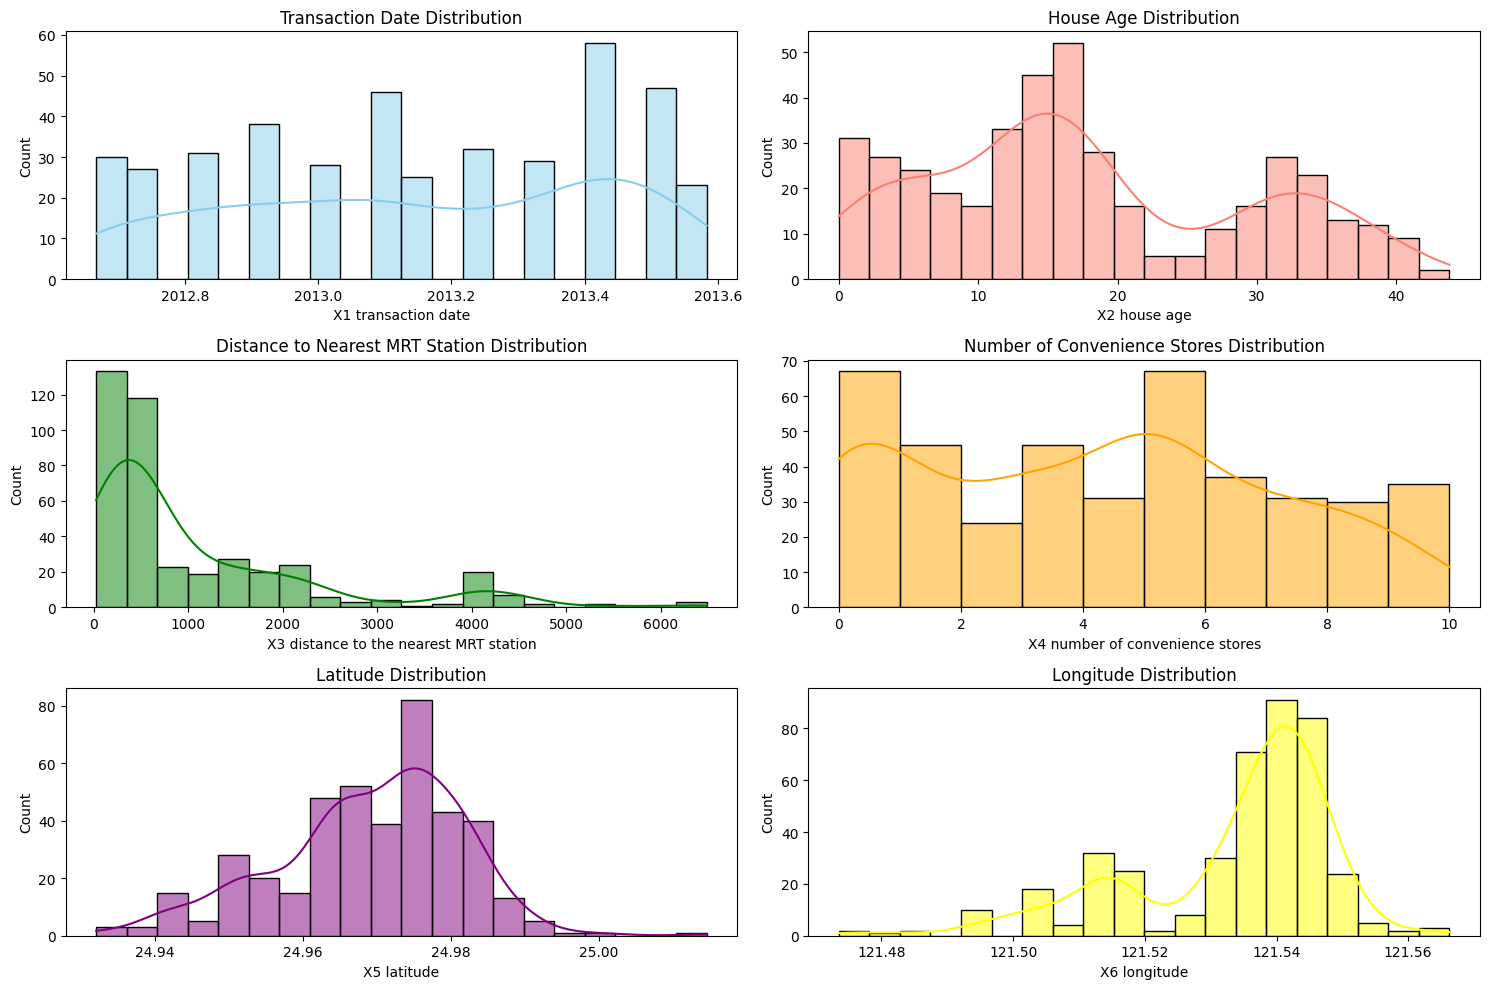

In [5]:
# Visualize distributions of numerical features
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(data['X1 transaction date'], kde=True, bins=20, color='skyblue')
plt.title('Transaction Date Distribution')

plt.subplot(3, 2, 2)
sns.histplot(data['X2 house age'], kde=True, bins=20, color='salmon')
plt.title('House Age Distribution')

plt.subplot(3, 2, 3)
sns.histplot(data['X3 distance to the nearest MRT station'], kde=True, bins=20, color='green')
plt.title('Distance to Nearest MRT Station Distribution')

plt.subplot(3, 2, 4)
sns.histplot(data['X4 number of convenience stores'], kde=True, bins=10, color='orange')
plt.title('Number of Convenience Stores Distribution')

plt.subplot(3, 2, 5)
sns.histplot(data['X5 latitude'], kde=True, bins=20, color='purple')
plt.title('Latitude Distribution')

plt.subplot(3, 2, 6)
sns.histplot(data['X6 longitude'], kde=True, bins=20, color='yellow')
plt.title('Longitude Distribution')

plt.tight_layout()
plt.show()



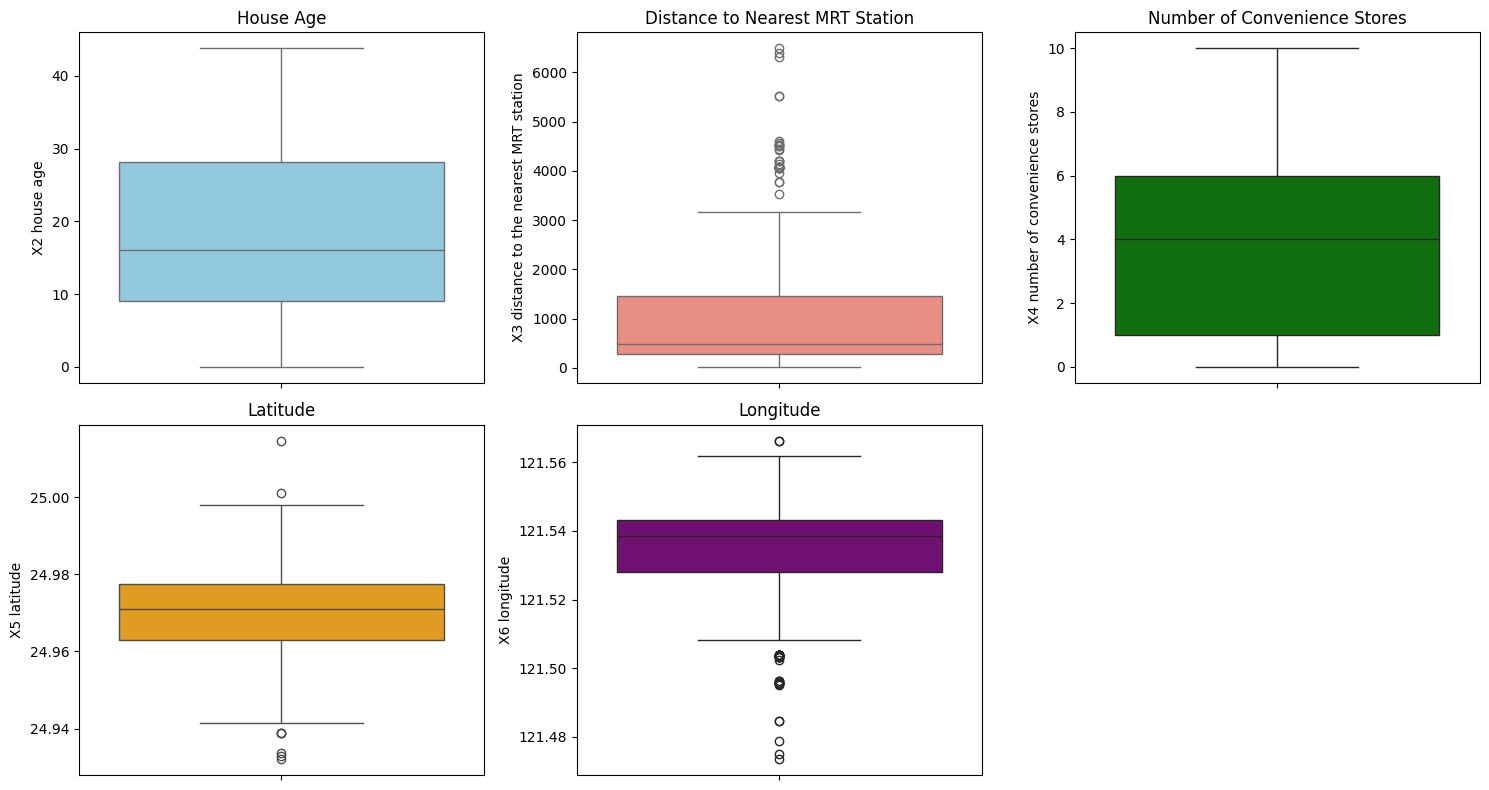

In [6]:
# Outlier Detection
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.boxplot(data['X2 house age'], color='skyblue')
plt.title('House Age')

plt.subplot(2, 3, 2)
sns.boxplot(data['X3 distance to the nearest MRT station'], color='salmon')
plt.title('Distance to Nearest MRT Station')

plt.subplot(2, 3, 3)
sns.boxplot(data['X4 number of convenience stores'], color='green')
plt.title('Number of Convenience Stores')

plt.subplot(2, 3, 4)
sns.boxplot(data['X5 latitude'], color='orange')
plt.title('Latitude')

plt.subplot(2, 3, 5)
sns.boxplot(data['X6 longitude'], color='purple')
plt.title('Longitude')

plt.tight_layout()
plt.show()

In [7]:
# Feature Importance
# Splitting features and target variable
X = data.drop(columns=['No', 'Y house price of unit area'])
Y = data['Y house price of unit area']

In [8]:
# Train Random Forest model to determine feature importances
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, Y)

RandomForestRegressor(random_state=42)

<ipython-input-9-eb8a5e906647>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")


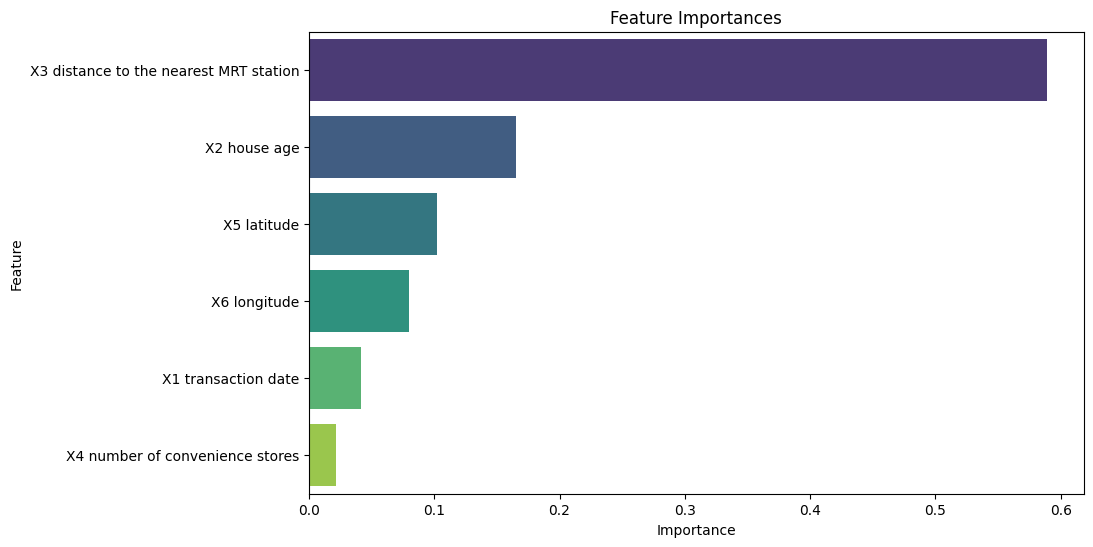

In [9]:
# Visualize feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

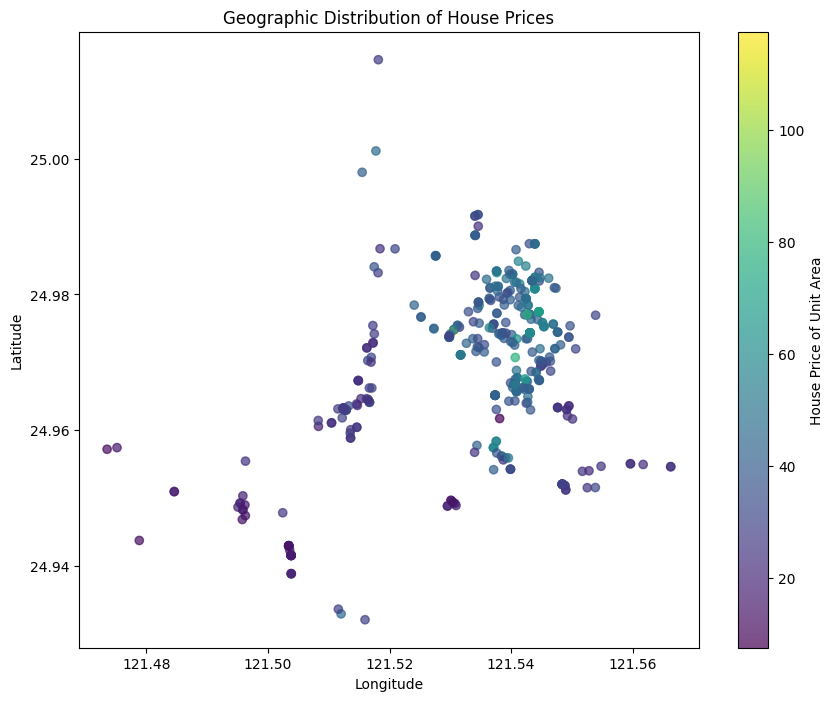

In [10]:
# Geographic Analysis
plt.figure(figsize=(10, 8))
plt.scatter(data['X6 longitude'], data['X5 latitude'], c=data['Y house price of unit area'], cmap='viridis', alpha=0.7)
plt.colorbar(label='House Price of Unit Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of House Prices')
plt.show()

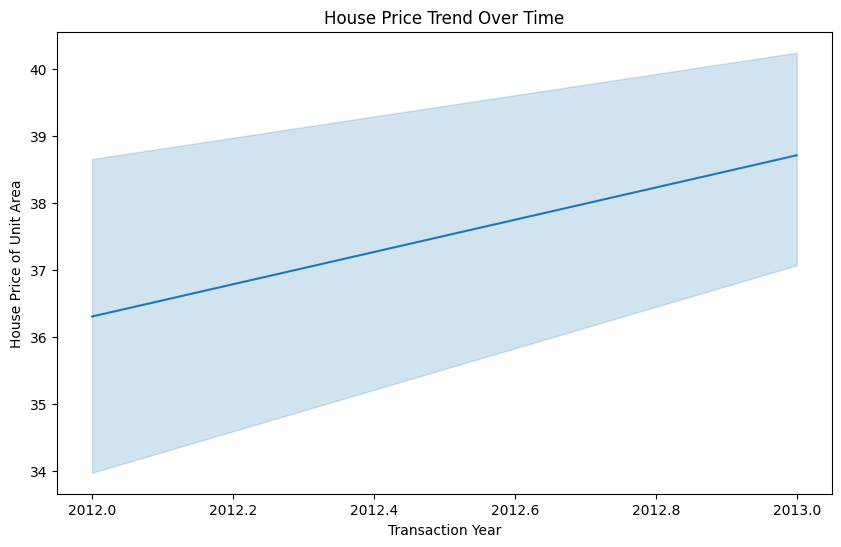

In [11]:
# Time Series Analysis
data['Transaction Year'] = data['X1 transaction date'].astype(int)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Transaction Year', y='Y house price of unit area', data=data)
plt.title('House Price Trend Over Time')
plt.xlabel('Transaction Year')
plt.ylabel('House Price of Unit Area')
plt.show()

<ipython-input-12-0f70867a8288>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")


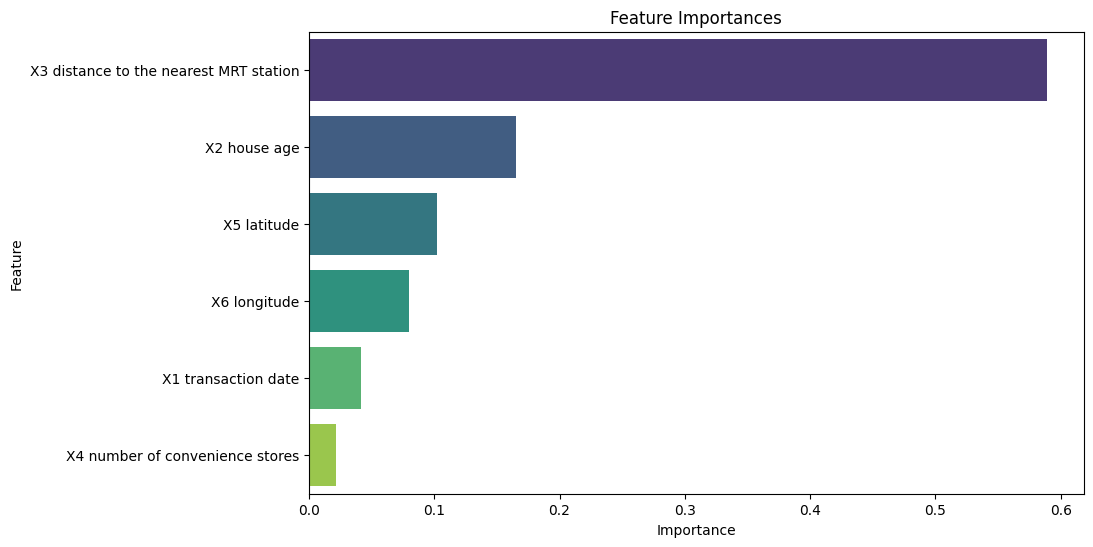

In [12]:
# Correlation with Target Variable
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted, y=feature_importances_sorted.index, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()